The dataset provides a synthetic representation of car data, encompassing various attributes such as car brand, model, manufacturing year, color, mileage, price, and location. 
Each row represents a unique car, identified by the Car ID. The dataset includes information about popular car brands such as Toyota, Honda, Ford, Chevrolet, and Hyundai, along with their respective models.

# Conclusions

**Understanding the data**

* The variable 'Price' visually presents a normal distribution.

* The year of manufacture varies between 2015 and 2020

* 75% of the cars were manufactured by the year 2019.

* Car prices vary between 12000.0 and 29000.0.

**EXPLORATORY DATA ANALYSIS:** 

**Correlation matrix**

* The numerical variables most correlated to 'Price'are 'Mileage' and 'Year'.

**Scatter plots show that:**

* There is a negative correlation between price and mileage
* As mileage increases, car prices decrease.

* There is a positive correlation between price and years.
* Newer cars are more expensive.

* There is a negative correlation between mileage and year.
* Older cars have higher mileage.

**Relationship with categorical features**

* Hyndai cars have greater range in car prices and the range of prices tends to be symmetrical.

* Cars in San Francisco have the widest price range with the highest values.
 
* Atlanta cars have the lowest values.
 
* Toyota cars are the oldest
 
* Chevrolet cars are the newest
 
* Silver cars are the ones with the highest price variation

* Gray cars are just cheaper.




# Importing libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.model_selection import train_test_split


# Import and read data

 **Understanding the data**

In [97]:
df = pd.read_csv('/kaggle/input/vehicle-manufacturing-dataset/Car Data.csv')
df.head()

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco


In [98]:
df.tail()

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
66,67,Honda,Fit,2017,Gray,55000,12000,Atlanta
67,68,Ford,Fusion,2018,White,50000,15000,Phoenix
68,69,Chevrolet,Malibu,2019,Blue,40000,17000,Houston
69,70,Hyundai,Venue,2016,Silver,60000,14000,Seattle
70,71,Toyota,Yaris,2017,Black,55000,12000,Los Angeles


In [99]:
df.shape

(71, 8)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car ID    71 non-null     int64 
 1   Brand     71 non-null     object
 2   Model     71 non-null     object
 3   Year      71 non-null     int64 
 4   Color     71 non-null     object
 5   Mileage   71 non-null     int64 
 6   Price     71 non-null     int64 
 7   Location  71 non-null     object
dtypes: int64(4), object(4)
memory usage: 4.6+ KB


In [101]:
df.nunique().sort_values()

Brand        5
Year         6
Color        7
Mileage     10
Location    10
Price       17
Model       41
Car ID      71
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [102]:
df['Price'].describe().T

count       71.000000
mean     19619.718310
std       4814.757662
min      12000.000000
25%      16000.000000
50%      19000.000000
75%      23000.000000
max      29000.000000
Name: Price, dtype: float64

**Normality**

* **Histogram**  
* **Normal probability plot**

/tmp/ipykernel_32/3622187572.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], fit=norm, bins = 20);


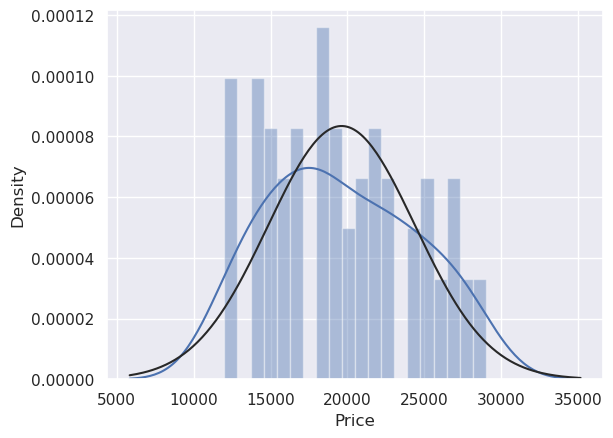

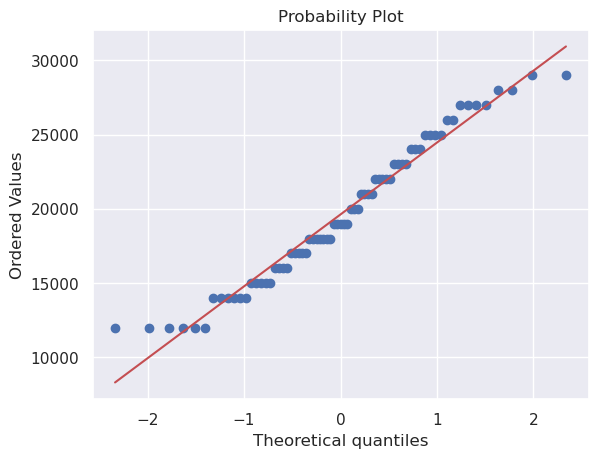

In [103]:
sns.distplot(df['Price'], fit=norm, bins = 20);
fig = plt.figure()
res = stats.probplot(df['Price'], plot=plt)

In [104]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Car ID,71.0,36.000000,20.639767,1.0,18.5,36.0,53.5,71.0
Year,71.0,2017.774648,1.532479,2015.0,2017.0,2018.0,2019.0,2020.0
Mileage,71.0,47464.788732,11080.009007,25000.0,40000.0,50000.0,55000.0,70000.0
Price,71.0,19619.718310,4814.757662,12000.0,16000.0,19000.0,23000.0,29000.0


In [105]:
df.Year.value_counts()

2019    15
2017    15
2018    14
2020    11
2016    10
2015     6
Name: Year, dtype: int64

**Correlation matrix - heatmap style**

/tmp/ipykernel_32/2809141620.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


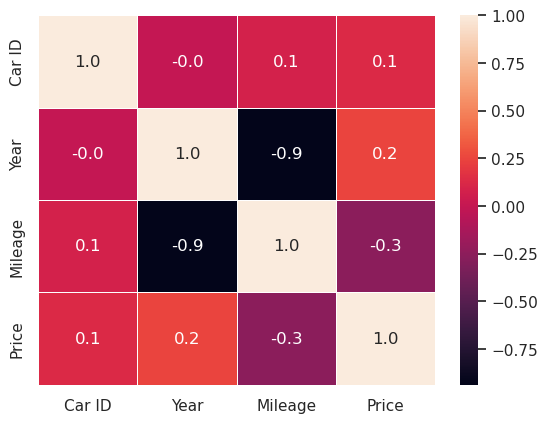

In [106]:
#df = df.drop(columns=['Car ID'])
correlacao = df.corr()
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot
plt.show()

**Scatter plots between 'Price' and correlated variables**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


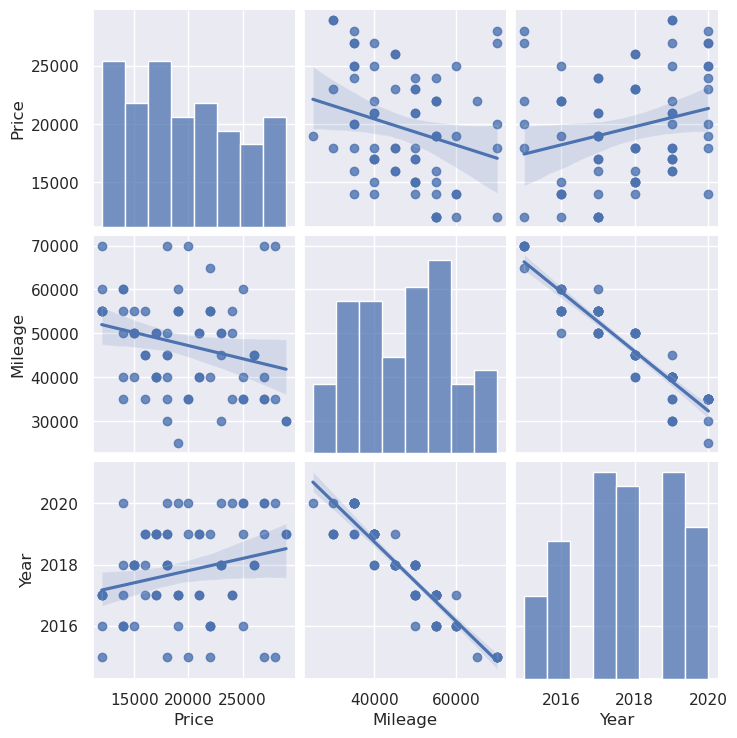

In [107]:
sns.set()
cols = ['Price', 'Mileage', 'Year']
sns.pairplot(df[cols], size = 2.5, kind = "reg")
plt.show();

**Relationship with categorical features**

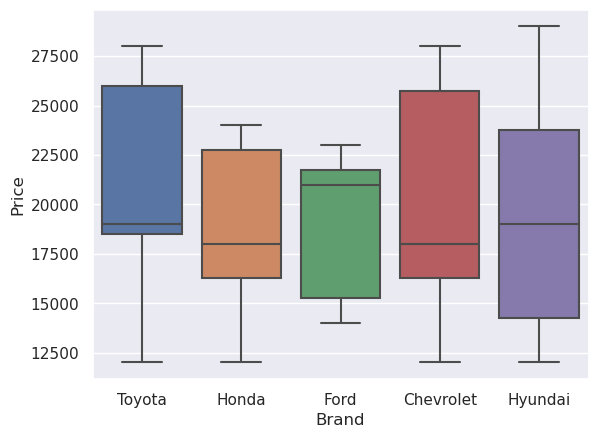

In [108]:
sns.boxplot(data=df, x = 'Brand', y='Price')
plt.show()

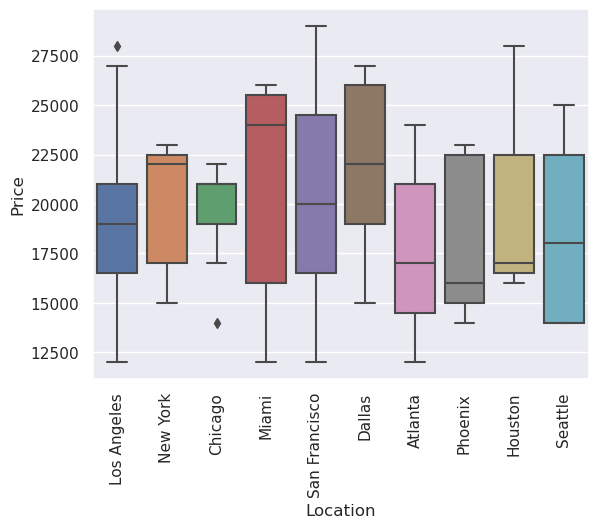

In [109]:
sns.boxplot(data=df, x = 'Location', y='Price')
plt.xticks(rotation='vertical')
plt.show()

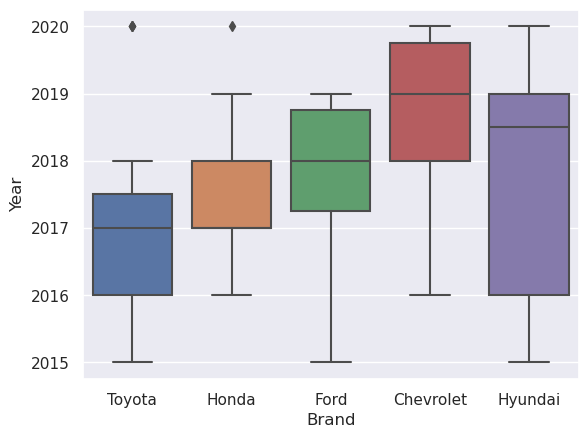

In [110]:
sns.boxplot(data=df, x="Brand", y="Year")
plt.show()

<Axes: xlabel='Color', ylabel='Price'>

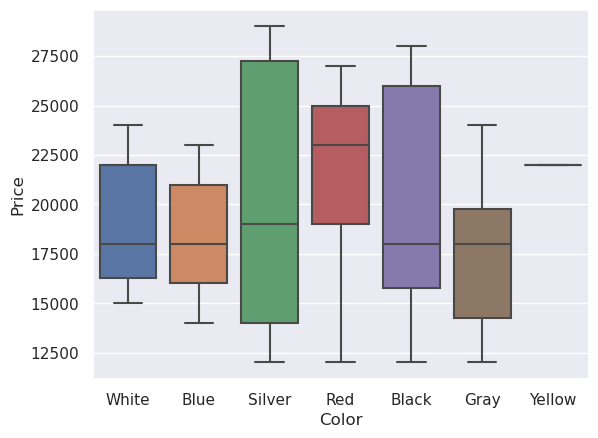

In [111]:
sns.boxplot(data=df, x="Color", y="Price")